# Importing Libraries

In [57]:
import math
import numpy as np
from random import gauss
from math import exp, sqrt
import matplotlib.pyplot as plt

The underlying stock S follows a GBM, which satisfies the stochastic differential equation (SDE)

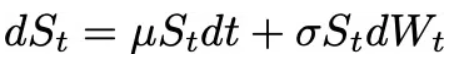

 **𝜇**: represents the drift rate of growth of the underlying stock.

 **W**: represents a Weiner process (one-dimensional Brownian motion).

 **𝜎** is the volatility of returns of the underlying asset.

 Using Ito's lemma, we get:

 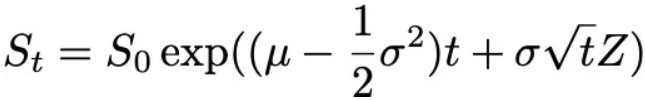 

**Z**: standard normal random variable.


# Functions

In [58]:
#This function calculates the simulated asset price St at maturity using the Black-Scholes formula for stock price evolution. 
#We need to change Z for each simulation of S_T 
Z= gauss(0,1.0)

#@S: Initial price of the underlying asset, 
#@v: 𝜎
#@r: risk free interest rate
#@q: Dividend yield
#@T: time to maturity, to expiration
def generate_stock_price(S,v,r,q,T,Z): 
    return S*np.exp( ( (r-q)-0.5*v**2)*T+v*np.sqrt(T)*Z )

In [59]:
# This function calculates the payoff for a European call option at maturity:
# @S_T : Simulated asset price at maturity.
# @K: Strike price of the option.
def call_payoff(S_T,K):
    return np.maximum(0,S_T-K)

# Variables and Parameteres

$S_{T}$ is the future price of the asset at time 𝑇, which is random and depends on the stock's volatility, interest rates, and other market factors.

In a Monte Carlo simulation, We are generating multiple potential values for $S_{T}$ based on the stochastic process defined for the asset (like the GBM in the image you shared).

Each path gives a different potential future price $S_{T}$, which is then used to calculate payoffs for options like calls and puts.

In [60]:
S0 = 100 # underlying price

v = 0.20 # volatility

r = 0.05 # risk free rate

q = 0.0 # dividend yield

T = 1 # maturity

K = 100. # exercise

N = 10000 #number of simulations

#payoffs = np.empty(N)
payoffs=[]

discount_factor = math.exp(-r * T)

# Simulated Asset Prices at Maturity

Text(0.5, 1.0, 'Distribution of Simulated Final Asset Prices at Maturity')

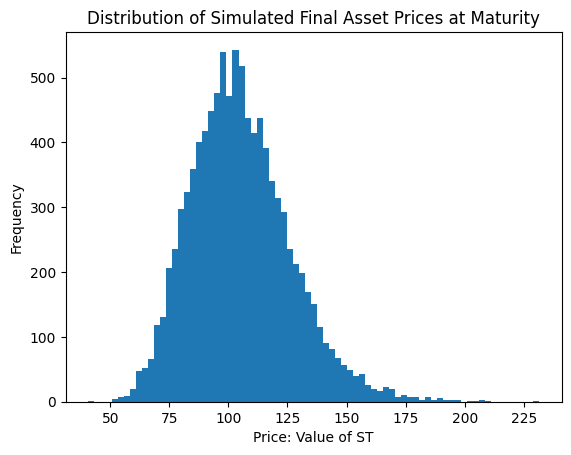

In [61]:
# lognormal distribution of the price

Z = np.random.normal(size=N)
ST = generate_stock_price(S0,v,r,q,T,Z)


plt.hist(ST, bins='auto')  
plt.xlabel('Price: Value of ST')
plt.ylabel('Frequency')
plt.title('Distribution of Simulated Final Asset Prices at Maturity')

# Monte Carlos Simulation

**Simulate Asset Prices**: The loop runs 10000 simulations. For each simulation, it generates a terminal stock price $S_{T}$ using the generate_asset_price() function.

**Calculate Payoffs**: For each simulated $S_{T}$, it calculates the corresponding call option payoff using the call_payoff() function and stores the result in the payoffs list.

**Discounting**: The average of all payoffs is discounted to the present value using the risk-free rate:

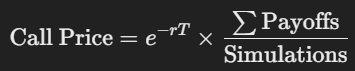

In [62]:
for i in range(N):
    Z= np.random.normal() #generate a random value for each simulation
    S_T = generate_stock_price(S0,v,r,q,T,Z)
    payoffs.append(call_payoff(S_T, K))

call_price = discount_factor * (sum(payoffs) / float(N))

# The put option price is derived using **Put-Call** Parity:
Knowing the Call and Put at t=0, we have:

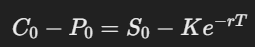

In [63]:
# From Put Call Parity

put_price = call_price + K * np.exp(-r * T) - S0 * np.exp(-q * T)

print (call_price, put_price)

10.428613218573565 5.551555668644966


# Including time ? 

In [64]:
# T is 1 year, so it has 52 weeks
weeks = 52
dt = T / weeks

S = np.zeros((weeks + 1, N)) #weeks+1 to include the initial price at t=0
S[0] = S0


for t in range(1,weeks+1):
    Z= np.random.normal(size=N) #generate a random value for each simulation
    S[t] = generate_stock_price(S[t-1],v,r,q,dt,Z)

#np.append(payoffs, call_payoff(S[t], K) )

WHAT CAN WE DO WITH THE GENERATED MATRIX OVER TIME ????????

In [66]:
# Calculate payoffs at maturity
payoffs = call_payoff(S[-1], K)

payoffs_put = call_payoff(-S[-1],-K)

# Calculate call price
call_price = discount_factor * np.mean(payoffs)

Instead of using the put call parity we will use the following:

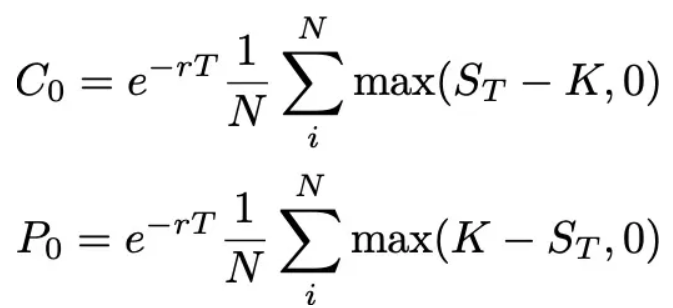

Call Price: 10.288519052776973
Put Price: 5.628938787910903


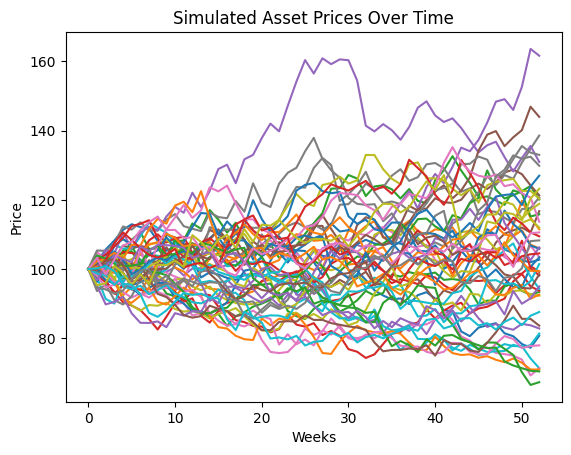

In [71]:
put_price = discount_factor * np.mean(payoffs_put)

print(f'Call Price: {call_price}')
print(f'Put Price: {put_price}')

# Plot simulated paths over time

num_paths_to_plot = 50  # Number of paths to plot
indices_to_plot = np.random.choice(S.shape[1], num_paths_to_plot, replace=False)
plt.figure()

for index in indices_to_plot:
    plt.plot(S[:, index], label=f'Path {index+1}')

plt.xlabel('Weeks')
plt.ylabel('Price')
plt.title('Simulated Asset Prices Over Time')
plt.show()

As you can see we got the same put and call value for both, the parity relation and with the normal equation here

A great thank to this blog: https://kinder-chen.medium.com/black-scholes-model-and-monte-carlo-simulation-d8612ac4519b
https://sites.google.com/view/vinegarhill-financelabs/monte-carlo